#   Analyzing Super Bowls and TV Data

- In this project we have 3 datasets :
1. super_bowls which have the details about the super bowl games like the city that the game has been played and the winners and the losers and the points that every player scored and the name of their coaches.

2. tv which have the details about the channels(network) and viewers to watch the games and their ratings and the advertisment cost.

3. half-time musicians which have the details about the musics that have been played between the games.

pre processing


In [13]:
import pandas as pd
from sklearn.impute import SimpleImputer

In [14]:
super_bowls = pd.read_csv(r'/content/super_bowls.csv')
tv = pd.read_csv(r'/content/tv.csv')
halftime_musicians = pd.read_csv(r'/content/halftime_musicians.csv')

In [15]:
# [1] Missing values before
tv.isnull().sum()

,0
super_bowl,0
network,0
avg_us_viewers,0
total_us_viewers,38
rating_household,0
share_household,0
rating_18_49,38
share_18_49,47
ad_cost,0


In [16]:
# [2] Fill missing numerical and categorical values
tv_data_filled = tv.copy()

# Fill numerical columns with mean
num_cols = ['total_us_viewers', 'share_household', 'rating_18_49', 'share_18_49']
tv_data_filled[num_cols] = SimpleImputer(strategy='mean').fit_transform(tv_data_filled[num_cols])

# Fill 'network' column with empty string
tv_data_filled['network'] = tv_data_filled['network'].fillna('')

In [17]:
# [3] Missing values after
tv_data_filled.isnull().sum()

,0
super_bowl,0
network,0
avg_us_viewers,0
total_us_viewers,0
rating_household,0
share_household,0
rating_18_49,0
share_18_49,0
ad_cost,0


In [18]:
# [5]
super_bowls_filled = super_bowls.fillna('')

In [19]:
# [6]
super_bowls_filled.isnull().sum()


,0
date,0
super_bowl,0
venue,0
city,0
state,0
attendance,0
team_winner,0
winning_pts,0
qb_winner_1,0
qb_winner_2,0


In [20]:
# [7]
halftime_musicians.isnull().sum()

,0
super_bowl,0
musician,0
num_songs,46


In [21]:
# [8]
halftime_filled = halftime_musicians.copy()
halftime_filled['num_songs'] = halftime_filled['num_songs'].fillna(0)
halftime_filled['musician'] = halftime_filled['musician'].fillna('')


In [22]:
# [9]
halftime_filled.isnull().sum()

,0
super_bowl,0
musician,0
num_songs,0


In [23]:
merged = pd.merge(super_bowls_filled, tv_data_filled, on='super_bowl', how='left')
merged = pd.merge(merged, halftime_filled, on='super_bowl', how='left')
merged.head()

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,...,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost,musician,num_songs
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,,...,NBC,103390000,148872000.0,43.1,68.0,33.4,78.0,5000000,Justin Timberlake,11.0
1,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,,...,NBC,103390000,148872000.0,43.1,68.0,33.4,78.0,5000000,University of Minnesota Marching Band,1.0
2,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,,...,Fox,111319000,172000000.0,45.3,73.0,37.1,79.0,5000000,Lady Gaga,7.0
3,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,,...,CBS,111864000,167000000.0,46.6,72.0,37.7,79.0,5000000,Coldplay,6.0
4,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,,...,CBS,111864000,167000000.0,46.6,72.0,37.7,79.0,5000000,Beyoncé,3.0


In [24]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load the dataset (adjust the path as needed)
halftime_show_artists = pd.read_csv('/content/halftime_musicians.csv')

# Make a copy of the original dataset
halftime_filled = halftime_show_artists.copy()

# Separate numeric and categorical columns
numeric_cols = halftime_filled.select_dtypes(include=['number']).columns
categorical_cols = halftime_filled.select_dtypes(include=['object']).columns

# Fill numeric columns with the mean
halftime_filled[numeric_cols] = SimpleImputer(strategy='mean').fit_transform(halftime_filled[numeric_cols])

# Fill categorical columns with empty string
for col in categorical_cols:
    halftime_filled[col] = halftime_filled[col].fillna('')

# Check for missing values
print("Missing values after preprocessing:")
print(halftime_filled.isnull().sum())

Missing values after preprocessing:
super_bowl    0
musician      0
num_songs     0
dtype: int64


Dimentionality reduction

In [25]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

# ----------------------------------------
# STEP 1: Convert categorical data to numeric
# ----------------------------------------

# 'musician' is a text column; we need to convert it to numbers using Label Encoding
label_encoder = LabelEncoder()
halftime_filled['musician_encoded'] = label_encoder.fit_transform(halftime_filled['musician'])

# ----------------------------------------
# STEP 2: Select features for PCA
# ----------------------------------------

# We'll use 'super_bowl' and the encoded 'musician' as features
X = halftime_filled[['super_bowl', 'musician_encoded']]

# ----------------------------------------
# STEP 3: Apply PCA
# ----------------------------------------

# Initialize PCA and reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# ----------------------------------------
# STEP 4: Display variance explained by each principal component
# ----------------------------------------

print("Explained variance by each component:")
print(pca.explained_variance_ratio_)

Explained variance by each component:
[0.83001624 0.16998376]


In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier  # You can choose a different classifier

# Initialize the classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X_pca, halftime_filled['super_bowl'], cv=5)

# Display the cross-validation scores and the average score
print(f'Cross-validation scores: {cv_scores}')
print(f'Average Cross-validation score: {cv_scores.mean()}')

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores: [0.2962963  0.40740741 0.40740741 0.37037037 0.23076923]
Average Cross-validation score: 0.34245014245014244


In [27]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Initialize the StratifiedKFold with 5 splits
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10)

# Perform Stratified cross-validation
cv_scores = cross_val_score(rf_model, X_pca, halftime_filled['super_bowl'], cv=stratified_kfold)

# Display the results
print(f'Cross-validation scores (Stratified): {cv_scores}')
print(f'Average Cross-validation score (Stratified): {cv_scores.mean()}')

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores (Stratified): [0.44444444 0.44444444 0.40740741 0.40740741 0.34615385]
Average Cross-validation score (Stratified): 0.40997150997151


Pruning

Missing values after preprocessing:
super_bowl    0
musician      0
num_songs     0
dtype: int64
Model accuracy: 0.0000


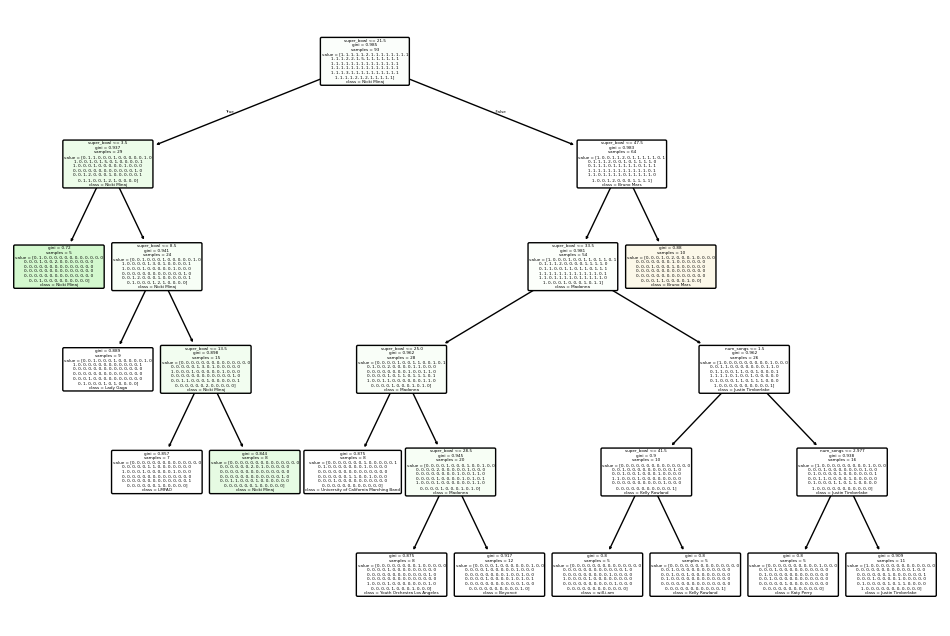

In [28]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load the dataset (adjust the path as needed)
halftime_show_artists = pd.read_csv('/content/halftime_musicians.csv')

# Make a copy of the original dataset
halftime_filled = halftime_show_artists.copy()

# Separate numeric and categorical columns
numeric_cols = halftime_filled.select_dtypes(include=['number']).columns
categorical_cols = halftime_filled.select_dtypes(include=['object']).columns

# Fill numeric columns with the mean
halftime_filled[numeric_cols] = SimpleImputer(strategy='mean').fit_transform(halftime_filled[numeric_cols])

# Fill categorical columns with empty string
for col in categorical_cols:
    halftime_filled[col] = halftime_filled[col].fillna('')

# Check for missing values
print("Missing values after preprocessing:")
print(halftime_filled.isnull().sum())

# Prepare the dataset for modeling
# Replace 'musician' with the actual target column name
X = halftime_filled.drop('musician', axis=1)  # Features
y = halftime_filled['musician']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train a decision tree classifier with pruning
# Using 'max_depth', 'min_samples_split', and 'min_samples_leaf' as pruning parameters
clf = DecisionTreeClassifier(max_depth=5,  # Max depth of the tree (pruning)
                             min_samples_split=10,  # Minimum samples required to split a node
                             min_samples_leaf=5,  # Minimum samples required to be at a leaf node
                             random_state=42)

clf.fit(X_train, y_train)

# Evaluate the model on the test set
score = clf.score(X_test, y_test)
print(f"Model accuracy: {score:.4f}")

# Plot the pruned decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=y.unique(), rounded=True)
plt.show()

## 1. TV, halftime shows, and the Big Game

In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import plotly.express as px

In [30]:
# Load the CSV data into DataFrames
super_bowls = pd.read_csv(r'/content/super_bowls.csv')

tv = pd.read_csv(r'/content/tv.csv')
halftime_musicians = pd.read_csv(r'/content/halftime_musicians.csv')

# super_bowls = super_bowls.sort_values("super_bowl",ascending=True)
# Display the first five rows of each DataFrame
display(super_bowls.head())
display(tv.head())
display(halftime_musicians.head())

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
2,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14
3,2015-02-01,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35


,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
0,52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000
1,51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000
2,50,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000
3,49,NBC,114442000,168000000.0,47.5,71,39.1,79.0,4500000
4,48,Fox,112191000,167000000.0,46.7,69,39.3,77.0,4000000


,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0


1. when we see the superbowls dataset we found that the qb_winner_2 and qb_loser_2 columns have missing values,so we know that the winner_1 and loser_1 played the entire game

2. in the tv dataset we found that we have a missing values in the total_us_viewers columns.

## 2. Taking note of dataset issues


In [31]:
super_bowls.info()
print(super_bowls.isna().sum())
# Summary of the TV data to inspect
tv.info()
print(tv.isna().sum())
print('\n')

# Summary of the halftime musician data to inspect
halftime_musicians.info()
print(halftime_musicians.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            52 non-null     object
 1   super_bowl      52 non-null     int64 
 2   venue           52 non-null     object
 3   city            52 non-null     object
 4   state           52 non-null     object
 5   attendance      52 non-null     int64 
 6   team_winner     52 non-null     object
 7   winning_pts     52 non-null     int64 
 8   qb_winner_1     52 non-null     object
 9   qb_winner_2     2 non-null      object
 10  coach_winner    52 non-null     object
 11  team_loser      52 non-null     object
 12  losing_pts      52 non-null     int64 
 13  qb_loser_1      52 non-null     object
 14  qb_loser_2      3 non-null      object
 15  coach_loser     52 non-null     object
 16  combined_pts    52 non-null     int64 
 17  difference_pts  52 non-null     int64 
dtypes: int64(6),

In the tv dataset we have alot of missing values in many columns like :
- total_us_viewers (amount of U.S. viewers who watched at least some part of the broadcast) about 38 missing values.

- rating_18_49 (average % of U.S. adults 18-49 who live in a household with a TV that were watching for the entire broadcast) about 38 missing values.
   
- share_18_49 (average % of U.S. adults 18-49 who live in a household with a TV in use that were watching for the entire broadcast) about 47 missing values.
   
In the halftime musician dataset we have 46 missing values in the num_songs column   

## 3. Combined points distribution


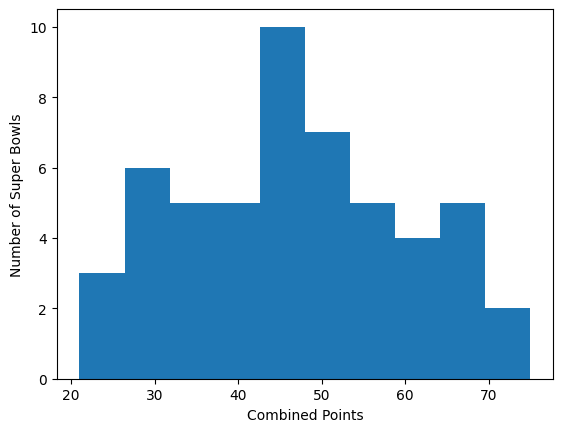

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
23,1995-01-29,29,Joe Robbie Stadium,Miami Gardens,Florida,74107,San Francisco 49ers,49,Steve Young,NaN,George Seifert,San Diego Chargers,26,Stan Humphreys,NaN,Bobby Ross,75,23


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
43,1975-01-12,9,Tulane Stadium,New Orleans,Louisiana,80997,Pittsburgh Steelers,16,Terry Bradshaw,NaN,Chuck Noll,Minnesota Vikings,6,Fran Tarkenton,NaN,Bud Grant,22,10
45,1973-01-14,7,Memorial Coliseum,Los Angeles,California,90182,Miami Dolphins,14,Bob Griese,NaN,Don Shula,Washington Redskins,7,Bill Kilmer,NaN,George Allen,21,7
49,1969-01-12,3,Orange Bowl,Miami,Florida,75389,New York Jets,16,Joe Namath,NaN,Weeb Ewbank,Baltimore Colts,7,Earl Morrall,Johnny Unitas,Don Shula,23,9


In [32]:
# # Import matplotlib and set plotting style
# plt.style.use('seaborn')

# Plot a histogram of combined points
plt.hist(x=super_bowls["combined_pts"])
plt.xlabel('Combined Points')
plt.ylabel('Number of Super Bowls')
plt.show()

# Display the Super Bowls with the highest and lowest combined scores
display(super_bowls[super_bowls['combined_pts'] > 70])
display(super_bowls[super_bowls["combined_pts"]< 25])

* Most combined scores are around 40-50 points.

* Going up to the highest combined scores at 74 and 75 :
- One even happened recently in 2018's Super Bowl 52 where Tom Brady's Patriots lost to Nick Foles' underdog Eagles 41-33 for a combined score of 74 and difference points equal to 8.

- And the other happened in 1995's Super Bowl 29  where Stan Humphreys's Patriots lost to Steve Young' underdog Eagles 49-26 for a combined score of 75 and difference points equal to 23.

* Going down to the lowest combined scores at 22 , 21 and 23 :
- These games happened in 1975 , 1973 and 1969 when Terry Bradshaw beat Fran Tarkenton for a combined score of 22 and difference points equal to 10 and so on.

## 4. Point difference distribution


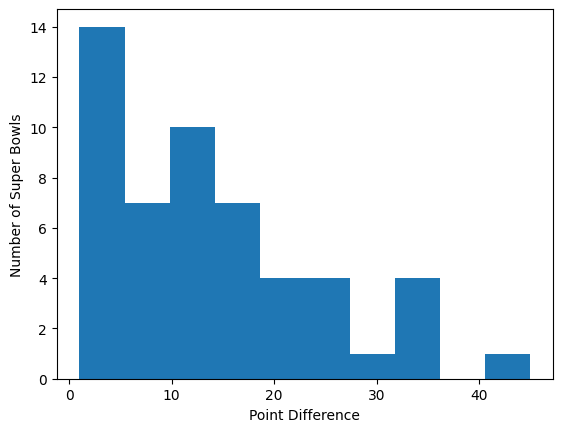

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
27,1991-01-27,25,Tampa Stadium,Tampa,Florida,73813,New York Giants,20,Jeff Hostetler,NaN,Bill Parcells,Buffalo Bills,19,Jim Kelly,NaN,Marv Levy,39,1


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35
25,1993-01-31,27,Rose Bowl,Pasadena,California,98374,Dallas Cowboys,52,Troy Aikman,NaN,Jimmy Johnson,Buffalo Bills,17,Jim Kelly,Frank Reich,Marv Levy,69,35
28,1990-01-28,24,Louisiana Superdome,New Orleans,Louisiana,72919,San Francisco 49ers,55,Joe Montana,NaN,George Seifert,Denver Broncos,10,John Elway,NaN,Dan Reeves,65,45
32,1986-01-26,20,Louisiana Superdome,New Orleans,Louisiana,73818,Chicago Bears,46,Jim McMahon,NaN,Mike Ditka,New England Patriots,10,Tony Eason,Steve Grogan,Raymond Berry,56,36


In [33]:
import numpy as np
# Plot a histogram of point differences
plt.hist(super_bowls.difference_pts)
plt.xlabel('Point Difference')
plt.ylabel("Number of Super Bowls")
plt.show()

# Display the closest game(s) and biggest blowouts
display(super_bowls[super_bowls["difference_pts"] == 1])
display(super_bowls[super_bowls["difference_pts"]>= 35])

- The vast majority of Super Bowls are close games.

- The closest game ever was when the Buffalo Bills lost to the New York Giants by 1 point in 1991.

- The biggest point discrepancy ever was 45 points (!) where Hall of Famer Joe Montana's led the San Francisco 49ers to victory in 1990, one year before the closest game ever.

- May be the big difference affected the viewership when the viewers watched the game and the game was boring .

## 5. Do blowouts translate to lost viewers?


,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost,date,...,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
27,25,ABC,79510000,NaN,41.9,63,NaN,NaN,800000,1991-01-27,...,Jeff Hostetler,NaN,Bill Parcells,Buffalo Bills,19,Jim Kelly,NaN,Marv Levy,39,1
5,47,CBS,108693000,164100000.0,46.3,69,39.7,77.0,4000000,2013-02-03,...,Joe Flacco,NaN,John Harbaugh,San Francisco 49ers,31,Colin Kaepernick,NaN,Jim Harbaugh,65,3
13,39,Fox,86072000,NaN,41.1,62,NaN,NaN,2400000,2005-02-06,...,Tom Brady,NaN,Bill Belichick,Philadelphia Eagles,21,Donovan McNabb,NaN,Andy Reid,45,3
14,38,CBS,89795000,144400000.0,41.4,63,NaN,NaN,2302200,2004-02-01,...,Tom Brady,NaN,Bill Belichick,Carolina Panthers,29,Jake Delhomme,NaN,John Fox,61,3
16,36,Fox,86801000,NaN,40.4,61,NaN,NaN,2200000,2002-02-03,...,Tom Brady,NaN,Bill Belichick,St. Louis Rams,17,Kurt Warner,NaN,Mike Martz,37,3


<Axes: xlabel='difference_pts', ylabel='share_household'>

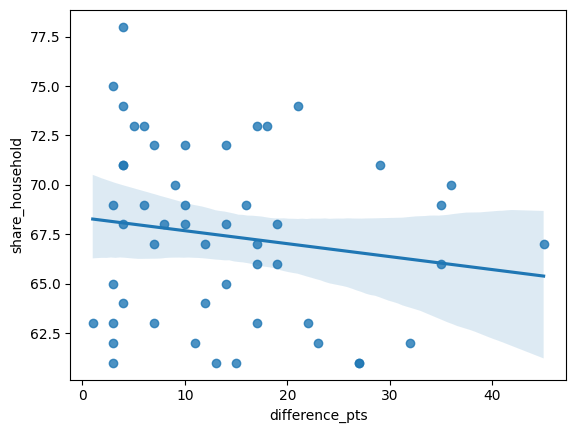

In [34]:
# Join game and TV data, filtering out SB I because it was split over two networks
games_tv = pd.merge(tv[tv['super_bowl'] > 1], super_bowls, on='super_bowl')
games_tv=games_tv.sort_values("difference_pts",ascending = True)
display(games_tv.head())

# Create a scatter plot with a linear regression model fit
sns.regplot(x= games_tv["difference_pts"], y= games_tv["share_household"], data=games_tv)

- From the regession plot we see that there is not relation between the difference points and share household but we must take it with a grain of salt because the linear relationship in the data is weak due to our small sample size of 52 games.

- We will see if the advertisers affected the viewership

## 6. Viewership and the ad industry over time


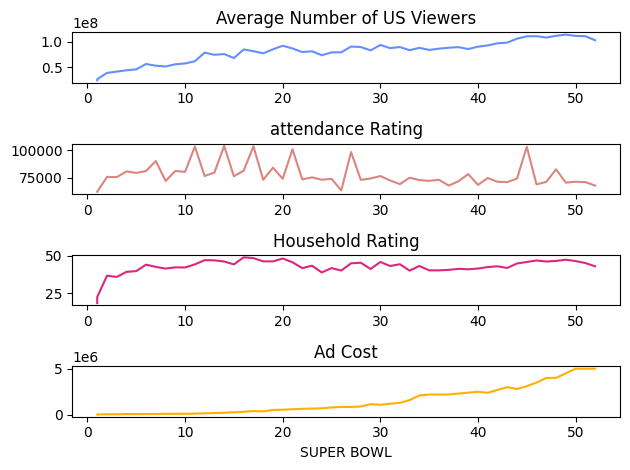

In [35]:
# Create a figure with 4x1 subplot and activate the top subplot
plt.subplot(4, 1, 1)
plt.plot(tv["super_bowl"], tv["avg_us_viewers"], color="#648FFF")
plt.title('Average Number of US Viewers')

# Activate the second subplot
plt.subplot(4, 1, 2)
plt.plot(super_bowls["super_bowl"],super_bowls["attendance"],color="#DC857F")
plt.title('attendance Rating')

# Activate the third subplot
plt.subplot(4, 1, 3)
plt.plot(tv["super_bowl"],tv["rating_household"],color="#DC267F")
plt.title('Household Rating')

# Activate the bottom subplot
plt.subplot(4, 1, 4)
plt.plot(tv["super_bowl"],tv["ad_cost"],color="#FFB000")
plt.title('Ad Cost')
plt.xlabel('SUPER BOWL')

# Improve the spacing between subplots
plt.tight_layout()

We can see viewers increased before ad costs did.

## 7. Halftime shows weren't always this great


In [36]:
# Display all halftime musicians for Super Bowls up to and including Super Bowl XXVII
halftime_musicians[halftime_musicians["super_bowl"]<=27]

,super_bowl,musician,num_songs
80,27,Michael Jackson,5.0
81,26,Gloria Estefan,2.0
82,26,University of Minnesota Marching Band,NaN
83,25,New Kids on the Block,2.0
84,24,Pete Fountain,1.0
85,24,Doug Kershaw,1.0
86,24,Irma Thomas,1.0
87,24,Pride of Nicholls Marching Band,NaN
88,24,The Human Jukebox,NaN
89,24,Pride of Acadiana,NaN


- Let's see all of the musicians that have done more than one halftime show, including their performance counts.

## 8. Who has the most halftime show appearances?


In [37]:
# Count halftime show appearances for each musician and sort them from most to least
halftime_appearances = halftime_musicians.groupby('musician').count()['super_bowl'].reset_index()
halftime_appearances = halftime_appearances.sort_values('super_bowl', ascending=False)

# Display musicians with more than one halftime show appearance
halftime_appearances[halftime_appearances['super_bowl'] > 1]

,musician,super_bowl
28,Grambling State University Tiger Marching Band,6
1,Al Hirt,4
104,Up with People,4
83,The Human Jukebox,3
25,Florida A&M University Marching 100 Band,2
36,Justin Timberlake,2
5,Beyoncé,2
44,Los Angeles Unified School District All City H...,2
57,Nelly,2
102,University of Minnesota Marching Band,2


The world famous Grambling State University Tiger Marching Band takes the crown with six appearances.

 From our previous inspections, the num_songs column has lots of missing values:
1. A lot of the marching bands don't have num_songs entries.
2. For non-marching bands, missing data starts occurring at Super Bowl XX.

## 9. Who performed the most songs in a halftime show?


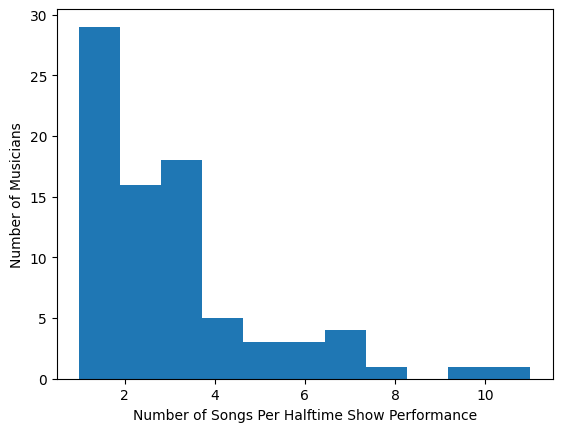

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
70,30,Diana Ross,10.0
10,49,Katy Perry,8.0
16,47,Beyoncé,7.0
2,51,Lady Gaga,7.0
33,41,Prince,7.0
90,23,Elvis Presto,7.0
14,48,Bruno Mars,6.0
3,50,Coldplay,6.0
25,45,The Black Eyed Peas,6.0


In [38]:
# Filter out most marching bands
no_bands = halftime_musicians[~halftime_musicians["musician"].str.contains('Marching')]
no_bands = no_bands[~no_bands["musician"].str.contains('Spirit')]

# Plot a histogram of number of songs per performance
most_songs = int(max(no_bands['num_songs'].values))
plt.hist(no_bands["num_songs"].dropna(), bins=most_songs )
plt.xlabel("Number of Songs Per Halftime Show Performance")
plt.ylabel('Number of Musicians')
plt.show()

# Sort the non-band musicians by number of songs per appearance.
no_bands = no_bands.sort_values('num_songs', ascending=False)
# display the top 15
display(no_bands.head(15))

- So most non-band musicians do 1-3 songs per halftime show.
- JT went off in 2018 about 11 songs.
- Diana Ross comes in second with 10 in her medley in 1996.

In [45]:
patriots = 'New England Patriots'
rams = 'Los Angeles Rams'

# Who will win Super Bowl LIII?
super_bowl_LIII_winner = rams
print('The winner of Super Bowl LIII will be the', super_bowl_LIII_winner)

The winner of Super Bowl LIII will be the Los Angeles Rams


In [46]:
correlation = games_tv[['difference_pts', 'share_household']].corr()
print(correlation)

                 difference_pts  share_household
difference_pts         1.000000        -0.155832
share_household       -0.155832         1.000000


In [47]:
from scipy.stats import ttest_ind

# Define two eras (example: before and after 2000)
era_1 = tv[tv['super_bowl'] < 2000]['avg_us_viewers']
era_2 = tv[tv['super_bowl'] >= 2000]['avg_us_viewers']

# Perform T-test
t_stat, p_value = ttest_ind(era_1, era_2)

print("T-test results:")
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Statistically significant difference in viewership between eras.")
else:
    print("No significant difference in viewership between eras.")

T-test results:
T-statistic: nan, P-value: nan
No significant difference in viewership between eras.


<ipython-input-47-9b014b578773>:8: SmallSampleWarning:

One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.



In [48]:
from scipy.stats import f_oneway
# Divide into decades
era_70s = tv[(tv['super_bowl'] >= 1970) & (tv['super_bowl'] < 1980)]['avg_us_viewers']
era_80s = tv[(tv['super_bowl'] >= 1980) & (tv['super_bowl'] < 1990)]['avg_us_viewers']
era_90s = tv[(tv['super_bowl'] >= 1990) & (tv['super_bowl'] < 2000)]['avg_us_viewers']
era_2000s = tv[(tv['super_bowl'] >= 2000) & (tv['super_bowl'] < 2010)]['avg_us_viewers']
era_2010s = tv[(tv['super_bowl'] >= 2010)]['avg_us_viewers']

# Perform ANOVA test
f_stat, p_value = f_oneway(era_70s, era_80s, era_90s, era_2000s, era_2010s)

print("ANOVA results:")
print(f"F-statistic: {f_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Statistically significant differences in viewership across decades.")
else:
    print("No significant difference in viewership across decades.")

ANOVA results:
F-statistic: nan, P-value: nan
No significant difference in viewership across decades.


<ipython-input-48-a33a434036fc>:10: SmallSampleWarning:

One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.



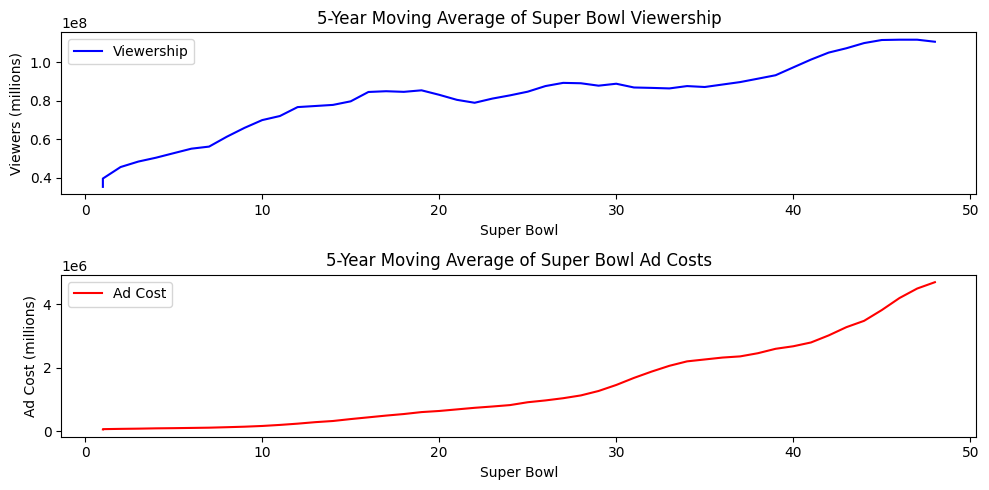

In [49]:
import matplotlib.pyplot as plt

# Compute 5-year moving averages
tv['viewers_ma'] = tv['avg_us_viewers'].rolling(window=5).mean()
tv['ad_cost_ma'] = tv['ad_cost'].rolling(window=5).mean()

# Plot moving averages
plt.figure(figsize=(10, 5))

plt.subplot(2, 1, 1)
plt.plot(tv['super_bowl'], tv['viewers_ma'], label="Viewership", color='blue')
plt.xlabel("Super Bowl")
plt.ylabel("Viewers (millions)")
plt.title("5-Year Moving Average of Super Bowl Viewership")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(tv['super_bowl'], tv['ad_cost_ma'], label="Ad Cost", color='red')
plt.xlabel("Super Bowl")
plt.ylabel("Ad Cost (millions)")
plt.title("5-Year Moving Average of Super Bowl Ad Costs")
plt.legend()

plt.tight_layout()
plt.show()

In [50]:
from sklearn.linear_model import LinearRegression

X = tv[['super_bowl']]  # Years as independent variable
y = tv['ad_cost']  # Ad costs as target variable

model = LinearRegression().fit(X, y)
future_years = [[2026], [2027], [2028]]  # Future Super Bowls
predicted_costs = model.predict(future_years)
print(predicted_costs)

[1.81986702e+08 1.82076968e+08 1.82167234e+08]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define high-scoring games (Threshold = 48 points)
super_bowls['high_scoring'] = (super_bowls['combined_pts'] > 48).astype(int)

# Select features
X = super_bowls[['super_bowl', 'difference_pts']]  # You can add more features
y = super_bowls['high_scoring']  # Target variable (1 = High scoring, 0 = Low scoring)

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.82
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.67      1.00      0.80         4

    accuracy                           0.82        11
   macro avg       0.83      0.86      0.82        11
weighted avg       0.88      0.82      0.82        11



In [52]:
tv[['super_bowl', 'ad_cost']].head()

,super_bowl,ad_cost
0,52,5000000
1,51,5000000
2,50,5000000
3,49,4500000
4,48,4000000


In [53]:
tv[['super_bowl', 'ad_cost']].describe()

,super_bowl,ad_cost
count,53.000000,5.300000e+01
mean,26.018868,1.456712e+06
std,15.411647,1.498315e+06
min,1.000000,3.750000e+04
25%,13.000000,1.850000e+05
50%,26.000000,8.500000e+05
75%,39.000000,2.385365e+06
max,52.000000,5.000000e+06


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt_dd5m2g/d263mmw9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt_dd5m2g/lw84jv58.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91360', 'data', 'file=/tmp/tmpt_dd5m2g/d263mmw9.json', 'init=/tmp/tmpt_dd5m2g/lw84jv58.json', 'output', 'file=/tmp/tmpt_dd5m2g/prophet_model1nbxisme/prophet_model-20250421161731.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:17:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:17:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages

         year  predicted_ad_cost
52 2018-12-31       5.653901e+06
53 2019-12-31       6.120656e+06
54 2020-12-31       5.713888e+06
55 2021-12-31       6.080387e+06
56 2022-12-31       6.497202e+06
57 2023-12-31       6.963957e+06
58 2024-12-31       6.557189e+06
59 2025-12-31       6.923688e+06
60 2026-12-31       7.340503e+06
61 2027-12-31       7.807258e+06


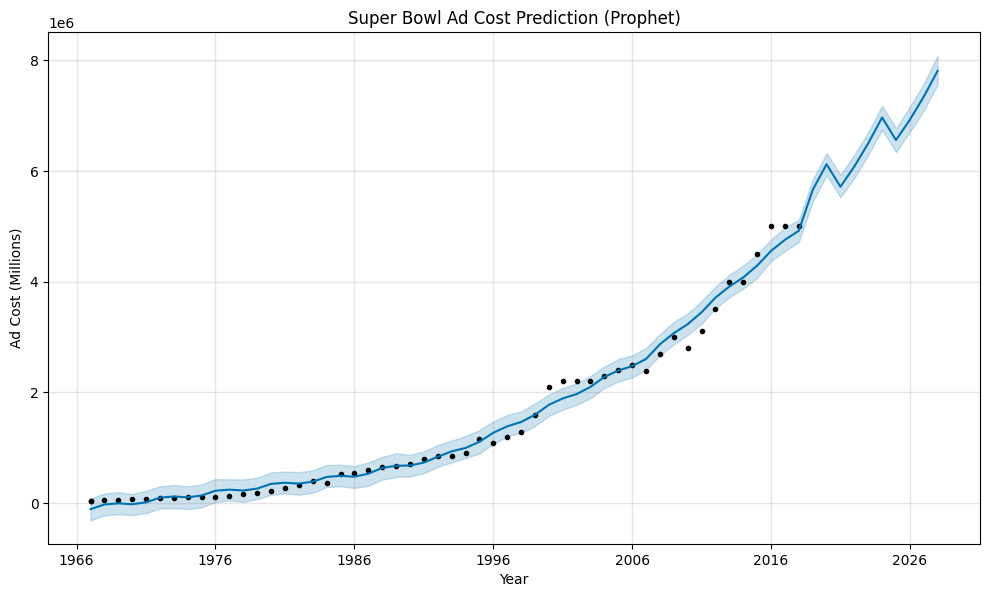

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Convert Super Bowl numbers to actual years
tv['year'] = tv['super_bowl'] + 1966

# Prepare data for Prophet
df = tv[['year', 'ad_cost']].rename(columns={'year': 'ds', 'ad_cost': 'y'})

# Convert 'ds' column to datetime format
df['ds'] = pd.to_datetime(df['ds'], format='%Y')

# Initialize and fit the Prophet model
model = Prophet()
model.fit(df)

# Create future dates for prediction
future = model.make_future_dataframe(periods=10, freq='Y')  # Predict 10 years ahead
forecast = model.predict(future)

# Show future predictions
future_ad_costs = forecast[['ds', 'yhat']].rename(columns={'ds': 'year', 'yhat': 'predicted_ad_cost'})
print(future_ad_costs.tail(10))  # Show the last few predictions

# Plot the forecast
model.plot(forecast)
plt.title("Super Bowl Ad Cost Prediction (Prophet)")
plt.xlabel("Year")
plt.ylabel("Ad Cost (Millions)")
plt.show()

In [55]:
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Example reactions to halftime shows
halftime_reactions = [
    "That Super Bowl halftime show was amazing!",
    "Worst halftime performance ever.",
    "It was okay, but I've seen better.",
    "Absolutely incredible! Loved every second of it!",
    "Terrible choice of performers. Very disappointing."
]

# Analyze sentiment for each reaction
for reaction in halftime_reactions:
    sentiment = analyzer.polarity_scores(reaction)
    print(f"Text: {reaction}\nSentiment: {sentiment}\n")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.4 MB/s eta 0:00:00
Text: That Super Bowl halftime show was amazing!
Sentiment: {'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'compound': 0.8398}

Text: Worst halftime performance ever.
Sentiment: {'neg': 0.577, 'neu': 0.423, 'pos': 0.0, 'compound': -0.6249}

Text: It was okay, but I've seen better.
Sentiment: {'neg': 0.0, 'neu': 0.485, 'pos': 0.515, 'compound': 0.6486}

Text: Absolutely incredible! Loved every second of it!
Sentiment: {'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.7232}

Text: Terrible choice of performers. Very disappointing.
Sentiment: {'neg': 0.622, 'neu': 0.378, 'pos': 0.0, 'compound': -0.7645}



## 10. The most hosted Cities for the Super Bowl Games

In [39]:
# Count occurrences of each city
city_counts = super_bowls['city'].value_counts().reset_index()

# Rename the columns for clarity
city_counts.columns = ['City', 'Number of Super Bowls']

# Create a bar plot using Plotly Express
fig = px.bar(city_counts, x='City', y='Number of Super Bowls', color='City',
             title='Number of Super Bowls in Each City')
fig.show()

print(city_counts.head())

            City  Number of Super Bowls
0    New Orleans                     10
1       Pasadena                      5
2  Miami Gardens                      5
3          Miami                      5
4          Tampa                      4


- New Orieans city is the most city that hosted the Super Bowl games with big difference for other cities.

## 11. Number of Super Bowls for the Winners and Loser


<ipython-input-40-aed12fe5c725>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-40-aed12fe5c725>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




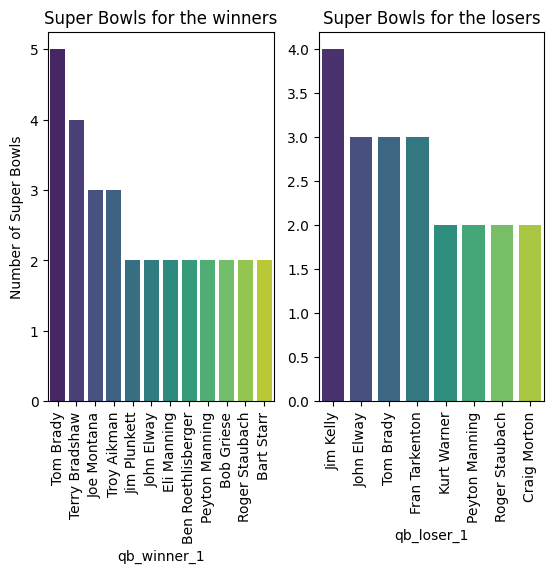

      qb_winner_1  Number of Super Bowls
0       Tom Brady                      5
1  Terry Bradshaw                      4
2     Joe Montana                      3
3     Troy Aikman                      3
4    Jim Plunkett                      2


       qb_loser_1  Number of Super Bowls
0       Jim Kelly                      4
1      John Elway                      3
2       Tom Brady                      3
3  Fran Tarkenton                      3
4     Kurt Warner                      2


In [40]:
# count the winner for super bowl games
winner_counts = super_bowls['qb_winner_1'].value_counts().reset_index()
# name the columns for the city_counts dataframe
winner_counts.columns = ['qb_winner_1', 'Number of Super Bowls']

# count the loser for super bowl games
loser_counts = super_bowls['qb_loser_1'].value_counts().reset_index()
# name the columns for the city_counts dataframe
loser_counts.columns = ['qb_loser_1', 'Number of Super Bowls']

# plot the winner who won the super bowl games more than one time
plt.subplot(1,2,1)
sns.barplot(data = winner_counts[winner_counts["Number of Super Bowls"]>1], x ="qb_winner_1", y="Number of Super Bowls" , palette ="viridis")
plt.xticks(rotation = 90)
plt.title("Super Bowls for the winners")

# plot the loser who lost the super bowl games more than one time
plt.subplot(1,2,2)
sns.barplot(data = loser_counts[loser_counts["Number of Super Bowls"]>1], x ="qb_loser_1", y="Number of Super Bowls" , palette ="viridis")
plt.ylabel('')
plt.title("Super Bowls for the losers")
plt.xticks(rotation = 90)
plt.show()

print(winner_counts.head())
print("\n")
print(loser_counts.head())

- Tom Brady is the person who has won the most Super Bowl games
- Jim Kelly is the person who has lost the most Super Bowl games

##  12. Number of Super Bowls for the Team Winners and Team Losers

<ipython-input-41-c4895910dd06>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-41-c4895910dd06>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




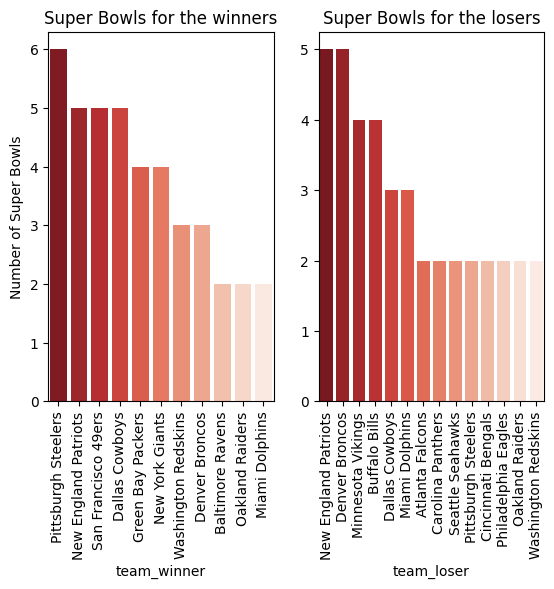

            team_winner  Number of Super Bowls
0   Pittsburgh Steelers                      6
1  New England Patriots                      5
2   San Francisco 49ers                      5
3        Dallas Cowboys                      5
4     Green Bay Packers                      4


             team_loser  Number of Super Bowls
0  New England Patriots                      5
1        Denver Broncos                      5
2     Minnesota Vikings                      4
3         Buffalo Bills                      4
4        Dallas Cowboys                      3


In [41]:
# count the Team Winner for super bowl games
TeamWinner_counts = super_bowls['team_winner'].value_counts().reset_index()
# name the columns for the Team Winner_counts dataframe
TeamWinner_counts.columns = ['team_winner', 'Number of Super Bowls']

# count the Team Loser for super bowl games
TeamLoser_counts = super_bowls['team_loser'].value_counts().reset_index()
# name the columns for the city_counts dataframe
TeamLoser_counts.columns = ['team_loser', 'Number of Super Bowls']

# plot the Team Winner who won the super bowl games more than one time
plt.subplot(1,2,1)
sns.barplot(data = TeamWinner_counts[TeamWinner_counts["Number of Super Bowls"]>1], x ="team_winner", y="Number of Super Bowls" , palette ="Reds_r")
plt.xticks(rotation = 90)
plt.title("Super Bowls for the winners")

# plot the Team Loser who lost the super bowl games more than one time
plt.subplot(1,2,2)
sns.barplot(data = TeamLoser_counts[TeamLoser_counts["Number of Super Bowls"]>1], x ="team_loser", y="Number of Super Bowls" , palette ="Reds_r")
plt.ylabel('')
plt.title("Super Bowls for the losers")
plt.xticks(rotation = 90)
plt.show()

print(TeamWinner_counts.head())
print("\n")
print(TeamLoser_counts.head())

- Pittsburgh Steelers is the team that won the most Super games
- New England Patriots is the team that lost the most Super Bowl games

## 13. winning points for each Super Bowl games

In [42]:
fig2 = px.line(super_bowls,x="super_bowl",y= "winning_pts",title="Winning points for each Super Bowl games")
fig2.show()

In this plot we need to know if Do the participants’ levels improve and are they able to achieve higher points when they win?

But from this relationship we find that this is not necessary

##  14. Conclusion

- In this notebook:
1. We loaded 3 datasets super_bowls, tv and half_time musicians and understand the Data.
2. We cleaned the datasets from the missing values.
3. Then explored Super Bowl game, television, and halftime show data.
4. We visualized the distributions of combined points, point differences, halftime show performances using histograms and the winners, team winners ,the losers and the team loser for the super bowl games.
5. We used line plots to see how ad cost increases lagged behind viewership increases. And we discovered that blowouts do appear to lead to a drop in viewers.

- Project Steps :
1. Understand the Data and ask questions that will be answered through this analysis.
2. Data Cleaning
3. Exploratory Data Analysis.
4. Data Visualization.
6. Document Key insights.

### key insights :

* Most combined scores are around 40-50 points.

* Going up to the highest combined scores at 74 and 75 :
- One even happened recently in 2018's Super Bowl 52 where Tom Brady's Patriots lost to Nick Foles' underdog Eagles 41-33 for a combined score of 74 and difference points equal to 8.

- And the other happened in 1995's Super Bowl 29  where Stan Humphreys's Patriots lost to Steve Young' underdog Eagles 49-26 for a combined score of 75 and difference points equal to 23.

* Going down to the lowest combined scores at 22 , 21 and 23 :
- These games happened in 1975 , 1973 and 1969 when Terry Bradshaw beat Fran Tarkenton for a combined score of 22 and difference points equal to 10 and so on.

- The vast majority of Super Bowls are close games.

- The closest game ever was when the Buffalo Bills lost to the New York Giants by 1 point in 1991.

- The biggest point discrepancy ever was 45 points (!) where Hall of Famer Joe Montana's led the San Francisco 49ers to victory in 1990, one year before the closest game ever.

- May be the big difference affected the viewership when the viewers watched the game and the game was boring .

- From the regession plot we see that there is not relation between the difference points and share household but we must take it with a grain of salt because the linear relationship in the data is weak due to our small sample size of 52 games.

- We will see if the advertisers affected the viewership

- We can see viewers increased before ad costs did.

- Let's see all of the musicians that have done more than one halftime show, including their performance counts.

- The world famous Grambling State University Tiger Marching Band takes the crown with six appearances.

![Grambling%20State%20University%20Tiger%20Marching%20Band.jpeg](attachment:Grambling%20State%20University%20Tiger%20Marching%20Band.jpeg)


- So most non-band musicians do 1-3 songs per halftime show.
- JT went off in 2018 about 11 songs.
- Diana Ross comes in second with 10 in her medley in 1996.

- New Orieans city is the most city that hosted the Super Bowl games with big difference for other cities.

![New%20Orieans.jpg](attachment:New%20Orieans.jpg)

- Tom Brady is the person who has won the most Super Bowl games.
- Jim Kelly is the person who has lost the most Super Bowl games.

![Tom%20Brady%20and%20Jim%20Kelly%20sd.png](attachment:Tom%20Brady%20and%20Jim%20Kelly%20sd.png)

- Pittsburgh Steelers is the team that won the most Super games.
- New England Patriots is the team that lost the most Super Bowl game.

![Pittsburgh%20Steelers%20and%20New%20England%20Patriots.png](attachment:Pittsburgh%20Steelers%20and%20New%20England%20Patriots.png)


In [43]:
# 1. Data Preprocessing
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Example preprocessing on a dataframe 'df'
df = pd.read_csv('/content/super_bowls.csv')  # Replace with your actual CSV path
df.dropna(inplace=True)
df = df.drop_duplicates()

# Encoding categorical variables if any
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

print("Preprocessing complete.")

Preprocessing complete.


Cross validation

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


model = make_pipeline(StandardScaler(), LogisticRegression())
scores = cross_val_score(model, X, y, cv=5)

print("Cross-validation scores:", scores)
print("Average accuracy:", scores.mean())


Cross-validation scores: [0.45454545 0.72727273 0.7        0.8        0.7       ]
Average accuracy: 0.6763636363636364
